In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen
import pprint

In [2]:
url = "http://ergast.com/api/f1/2022/10/driverStandings.json?limit=100000&offset=0"
r = requests.get(url)

data = r.json()
driver_info = data['MRData']['StandingsTable']['StandingsLists'][0]
driver_info_2 = driver_info['DriverStandings']


pprint.pprint(driver_info_2[0])



{'Constructors': [{'constructorId': 'red_bull',
                   'name': 'Red Bull',
                   'nationality': 'Austrian',
                   'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing'}],
 'Driver': {'code': 'VER',
            'dateOfBirth': '1997-09-30',
            'driverId': 'max_verstappen',
            'familyName': 'Verstappen',
            'givenName': 'Max',
            'nationality': 'Dutch',
            'permanentNumber': '33',
            'url': 'http://en.wikipedia.org/wiki/Max_Verstappen'},
 'points': '181',
 'position': '1',
 'positionText': '1',
 'wins': '6'}


In [3]:
driver_points = []
driver_name = []
round_ = []

In [4]:
for f1_round in list(range(1,17)):
    
    
    
    url = "http://ergast.com/api/f1/2022/{}/driverStandings.json?limit=100000&offset=0"
    r = requests.get(url.format(f1_round))

    data = r.json()
    
    data = r.json()
    driver_info = data['MRData']['StandingsTable']['StandingsLists'][0]
    driver_info_2 = driver_info['DriverStandings']
       
    
   
    for driver in range(20):
        
        
        driver_points.append(int(driver_info_2[driver]['points']))
        driver_name.append(driver_info_2[driver]['Driver']['driverId'])
        round_.append(f1_round)
        
        
        

        
        


    

In [5]:
# Driver Points
d_p  = pd.DataFrame()
d_p['round'] = round_
d_p['driver'] = driver_name
d_p['points'] = driver_points

In [6]:
d_p[d_p['driver'] == 'sainz']

,round,driver,points
1,1,sainz,18
21,2,sainz,33
42,3,sainz,33
64,4,sainz,38
84,5,sainz,53
104,6,sainz,65
124,7,sainz,83
144,8,sainz,83
164,9,sainz,102
183,10,sainz,127


In [7]:
def define_driver_color(driver):
    
    if driver == 'sainz' or driver == 'leclerc':
        color = (255/255,   45/255,  0 /255)

        
    elif driver == 'max_verstappen' or driver == 'perez':
        color = (16/255,   0/255,  255/255)

        
    elif driver == 'hamilton' or driver == 'russell':
        color = (11/255,   214/255,  197/255)

        
    elif driver == 'kevin_magnussen' or driver == 'mick_schumacher':
        color = (156/255,   12/255,  33/255)

        
    elif driver == 'gasly' or driver == 'tsunoda':
        color = (178/255,   196/255,  213/255)

    elif driver == 'alonso' or driver == 'ocon':
        color = (255/255,   0/255,  209/255)

        
    elif driver == 'albon' or driver == 'latifi' or driver == 'de_vries':
        color = (87/255,   139/255,  187/255)

        
    elif driver == 'bottas' or driver == 'zhou':
        color = (155/255,   42/255,  42/255)

        
    elif driver == 'hulkenberg' or driver == 'stroll' or driver == 'vettel':
        color = (14/255,   98/255,  15/255)

        
    elif driver == 'norris' or driver == 'ricciardo':
        color = (255/255,   142/255,  0/255)

    else:
        print('none!')
    
    return color

In [8]:
color_aux = define_driver_color('sainz')
color_aux 

(1.0, 0.17647058823529413, 0.0)

In [9]:
rounds = d_p['round'].unique()
print(rounds)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [10]:
driver_info = d_p[d_p['driver'] == 'vettel']

driver_info.iloc[:,2].tolist()

#puntos = driver_info.iloc[:,2].tolist()

[4, 4, 4, 5, 13, 13, 15, 15, 15, 16, 20, 20, 20]

In [11]:
driver_names = d_p['driver'].unique()
print(driver_names)
rounds = d_p['round'].unique()

['leclerc' 'sainz' 'hamilton' 'russell' 'kevin_magnussen' 'bottas' 'ocon'
 'tsunoda' 'alonso' 'zhou' 'mick_schumacher' 'stroll' 'albon' 'ricciardo'
 'norris' 'latifi' 'hulkenberg' 'perez' 'max_verstappen' 'gasly' 'vettel'
 'de_vries']


<Figure size 432x288 with 0 Axes>

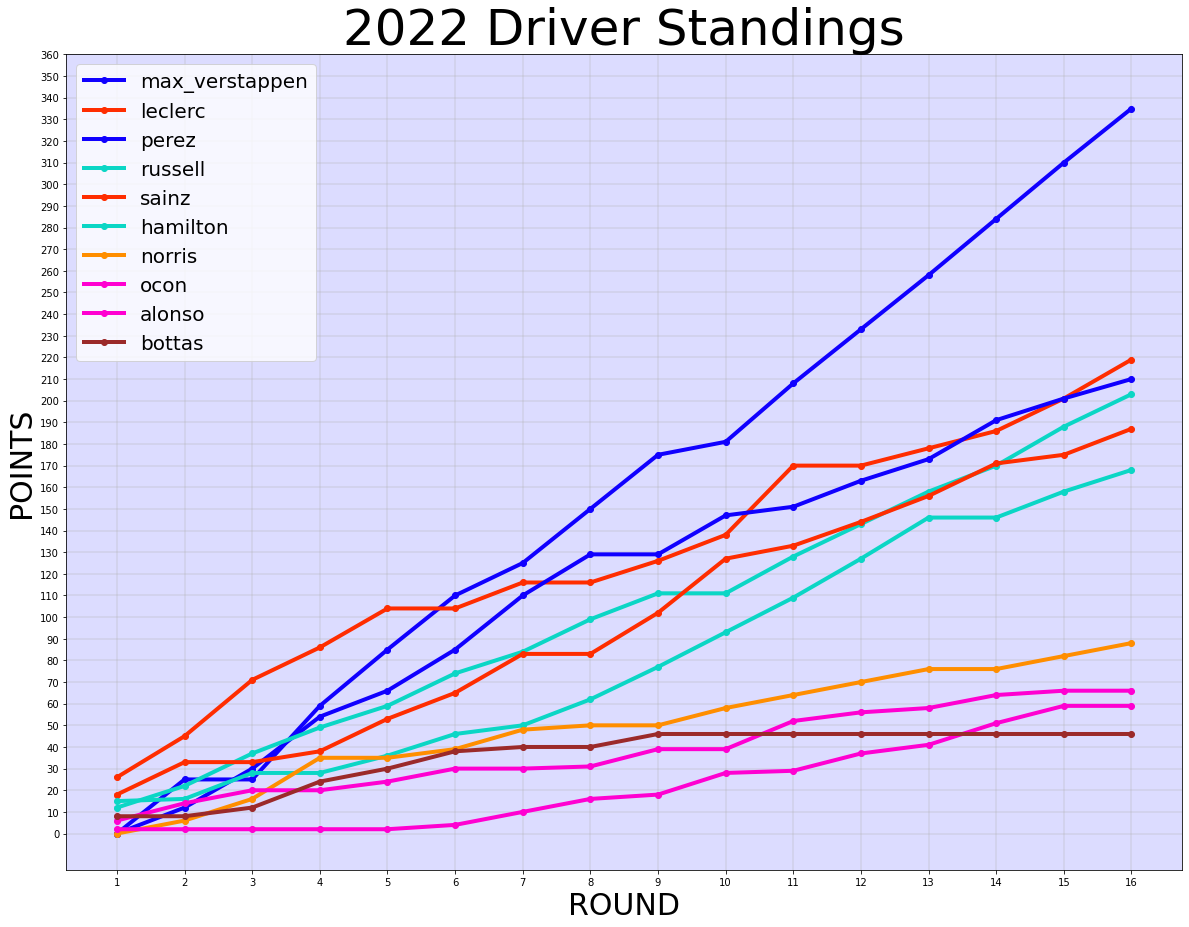

In [12]:
driver_names = ['max_verstappen','leclerc','perez', 'russell','sainz' ,'hamilton','norris','ocon','alonso','bottas']
rounds = d_p['round'].unique()


fig = plt.figure()
fig, ax = plt.subplots()
    
fig.set_figheight(15)
fig.set_figwidth(20)

for driver in driver_names:


    driver_info = d_p[d_p['driver'] == driver]
    puntos = driver_info.iloc[:,2].tolist()
    
    color_aux = define_driver_color(driver)
    
    plt.plot(rounds, puntos, linewidth=4,marker='o', linestyle="-",color = color_aux,label =driver)

ax.set_facecolor((220/255,220/255 ,255/255  ))
ax.grid(axis='both', linewidth=0.45)
plt.legend(fontsize = 20)
plt.xticks(np.arange(1, 17, step=1),size = 10)
plt.yticks(np.arange(0, 370, step=10))
plt.title('2022 Driver Standings',size = 50)
ax.set_ylabel('POINTS',fontsize = 30)
ax.set_xlabel('ROUND', fontsize = 30)
plt.show()
    

In [13]:
lap_times = {
            'Circuit':[],
            'round':[],
            'lap_number': [],
            'driver': [],
            'position': [],
            'time': []
            }

In [14]:
# This loop 
for f1_round in list(range(1,17)):
    
    url = 'http://ergast.com/api/f1/2022/{}/laps.json?limit=100000&offset=0'
    r = requests.get(url.format(f1_round))
    data = r.json()
    
    gp = data['MRData']['RaceTable']['Races'][0]
    
    
    

    for item in gp['Laps']:
        i = 0

        for item_2 in item['Timings']:
            # The number of the lap 
            
            lap_times['lap_number'].append(int(item['number']))
            lap_times['driver'].append(item_2['driverId'])
            lap_times['position'].append(item_2['position'])
            lap_times['time'].append(item_2['time'])
            lap_times['round'].append(gp['round'])
            lap_times['Circuit'].append(gp['Circuit']['circuitId'])
            
            
            
            

In [15]:
df = pd.DataFrame(lap_times)

In [16]:
round_16 = df[df['round'] == '16']

In [17]:
pilotos = round_16['driver'].unique()
lap_numbers = round_16['lap_number'].unique()
laps_round_16 = len(lap_numbers)

In [18]:
round_16_pos = pd.DataFrame()
round_16_pos = pd.DataFrame(columns = pilotos)

In [19]:
for piloto in pilotos:
    #print('For:',piloto,'estos son los resultados:')
    
    positions = round_16[round_16['driver'] == piloto]
    positions_pilot = positions['position']
    
    positions_pilot = positions_pilot.to_list()
    positions_pilot = [int(x) for x in positions_pilot]
    
    
    
    if len(positions_pilot) <laps_round_16:

        x = laps_round_16 -len(positions_pilot)

        a = np.zeros(x)
        a[:] = np.nan
        a = a.tolist()

        
        positions_pilot = positions_pilot + a
        

        

    
    round_16_pos[piloto] = positions_pilot
       
    

<Figure size 432x288 with 0 Axes>

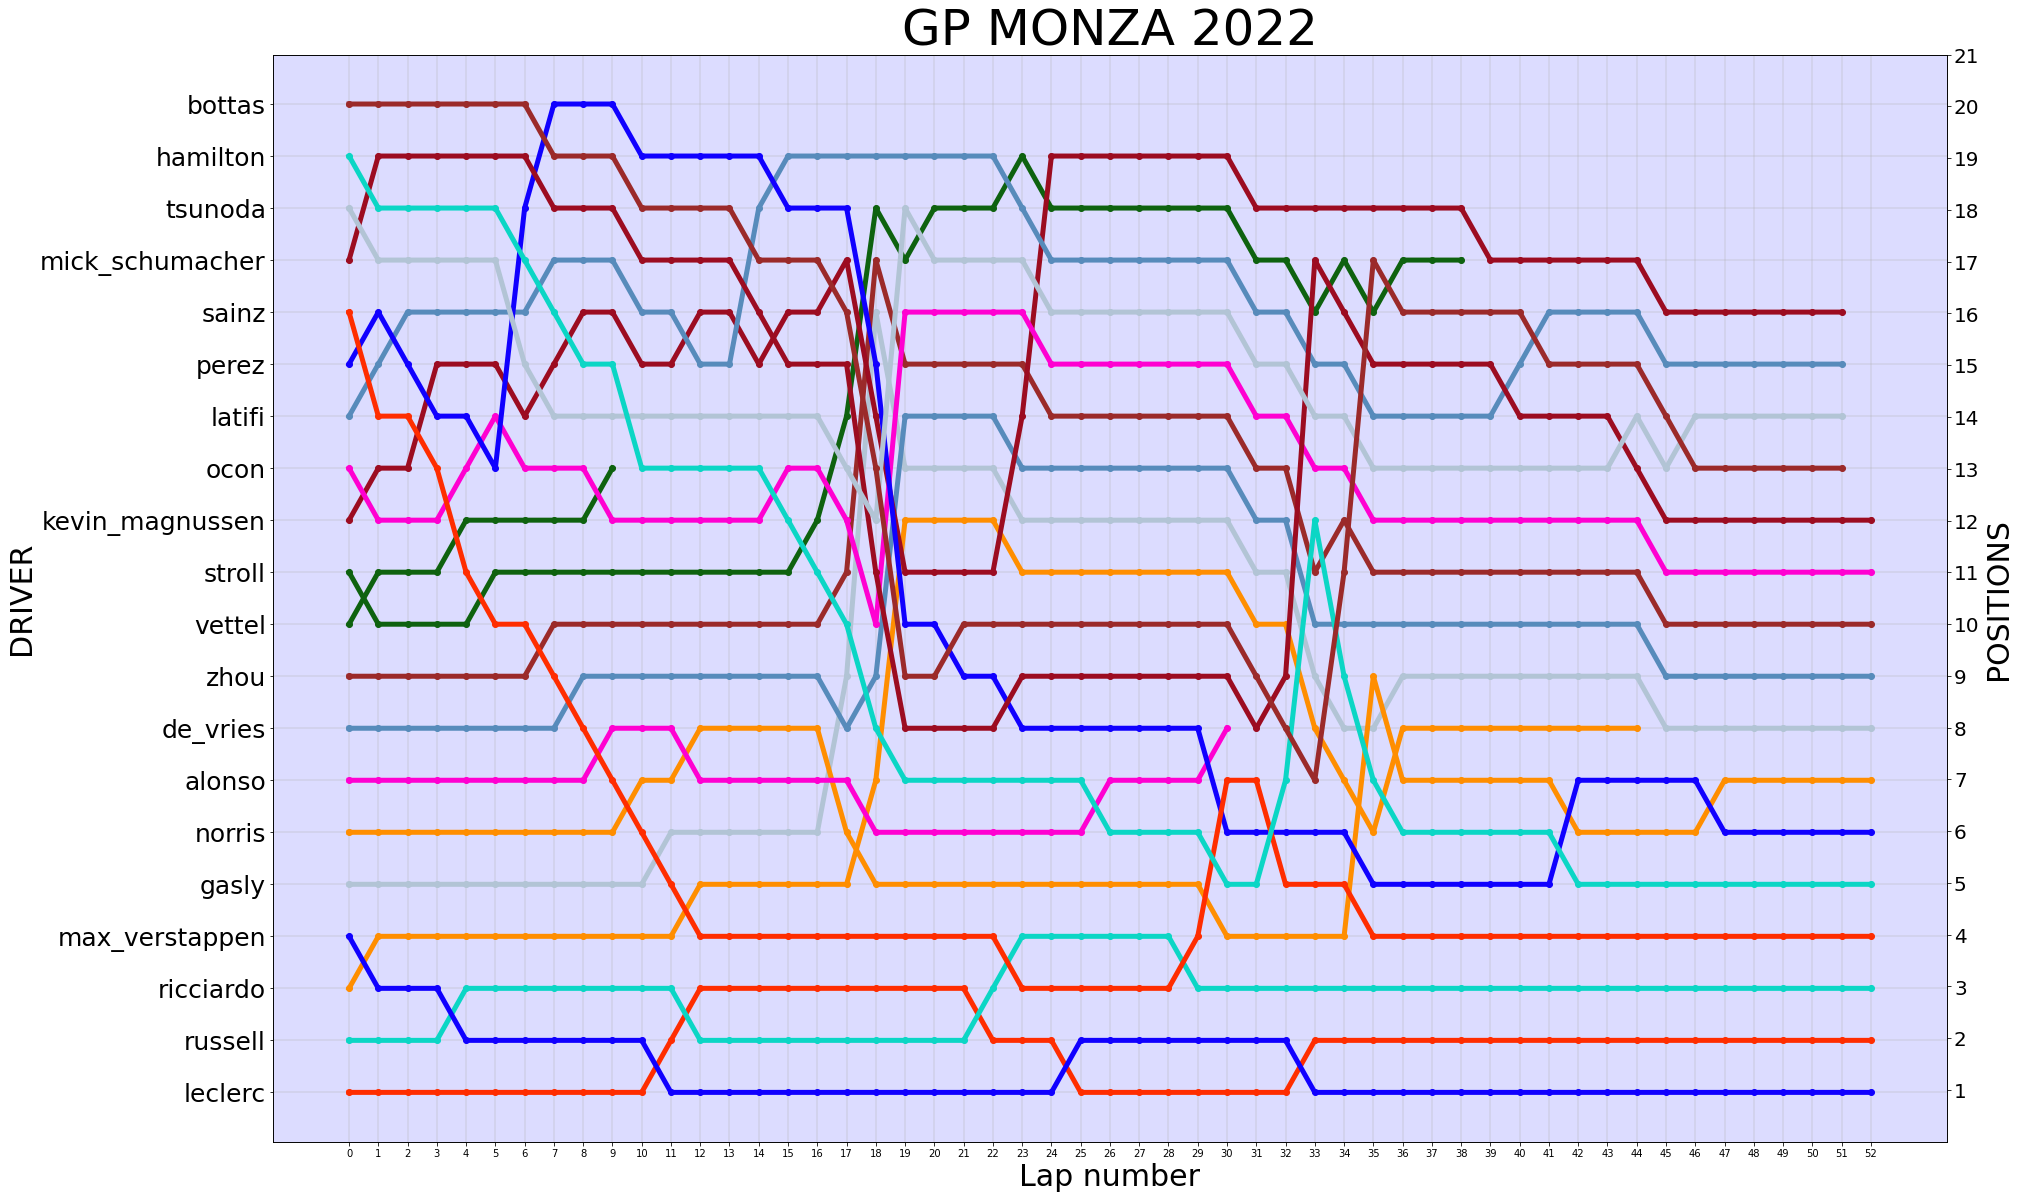

In [20]:
def create_plot(df):
    
    pilotos = df.columns.to_list()
    laps = df.index.values.tolist() 
    fig = plt.figure()
    fig, ax = plt.subplots()
    
    fig.set_figheight(20)
    fig.set_figwidth(30)
    
    for i in range(df.shape[1]):
        driver = pilotos[i]
        color_aux = define_driver_color(driver)
        plt.plot(laps,df.iloc[:,i], linewidth=5,marker='o', linestyle="-", color = color_aux)

        
    
    plt.yticks(np.arange(1,21), pilotos, size = 25)
    ax2=ax.twinx()
    ax2.set_ylabel("POSITIONS",fontsize=30)
    ax.set_ylabel('DRIVER',fontsize = 30)
    ax.set_xlabel('Lap number', fontsize = 30)
    
    plt.yticks(np.arange(1, 22, step=1),size = 20)
    
    ax.set_facecolor((220/255,220/255 ,255/255  ))
    ax.grid(axis='both', linewidth=0.45)
    plt.ylim([0, 21])
    plt.xticks(np.arange(0, 53, step=1))
    plt.title('GP MONZA 2022',size = 50)
    plt.show();

create_plot(round_16_pos)

In [21]:
constructors_points = []
constructor_name = []
round_ = []

In [22]:
for f1_round in list(range(1,17)):
    
    
    
    url = "http://ergast.com/api/f1/2022/{}/constructorStandings.json?limit=100000&offset=0"
    r = requests.get(url.format(f1_round))

    data = r.json()
    
    useful_data = data['MRData']['StandingsTable']['StandingsLists']
    useful_data = useful_data[0]
    constructor_points = useful_data['ConstructorStandings']
    
    #pprint.pprint(constructor_points[0])        
    
   
    for team in range(10):
        
        round_info = constructor_points[team]
        #pprint.pprint(round_info)
        
        
        #pprint.pprint(round_info['Constructor']['constructorId'])
        
        constructors_points.append(int(round_info['points']))
        constructor_name.append(round_info['Constructor']['constructorId'])
        round_.append(f1_round)
        
        
        

        
        

In [23]:
#Construction Points
c_p  = pd.DataFrame()
c_p['round'] = round_
c_p['team'] = constructor_name
c_p['points'] = constructors_points

In [24]:
def define_team_color(team):
    
    if team == 'ferrari' :
        color = (255/255,   45/255,  0 /255)

        
    elif team == 'red_bull':
        color = (16/255,   0/255,  255/255)

        
    elif  team == 'mercedes':
        color = (11/255,   214/255,  197/255)

        
    elif  team == 'haas':
        color = (0/255,  0/255,  0/255)

        
    elif team == 'alphatauri':
        color = (178/255,   196/255,  213/255)

    elif  team == 'alpine':
        color = (255/255,   0/255,  209/255)
        
    elif  team == 'williams':
        color = (87/255,   139/255,  187/255)

        
    elif  team == 'alfa':
        color = (155/255,   42/255,  42/255)

        
    elif team == 'aston_martin' :
        color = (14/255,   98/255,  15/255)

        
    elif team == 'mclaren' :
        color = (255/255,   142/255,  0/255)

    else:
        print('none!')
    
    return color

In [25]:
color_aux = define_team_color('alpine')
color_aux 

(1.0, 0.0, 0.8196078431372549)

<Figure size 432x288 with 0 Axes>

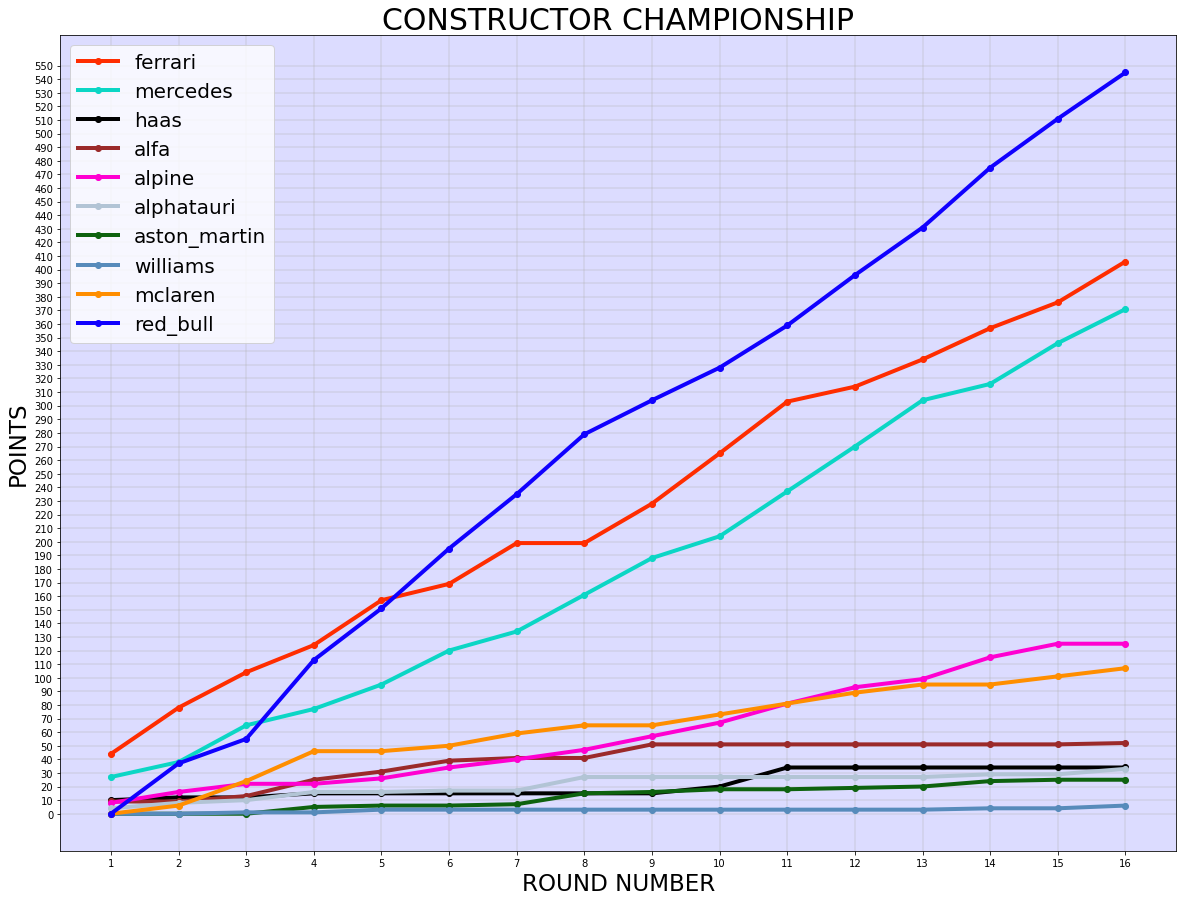

In [26]:
team_names = c_p['team'].unique()
rounds = c_p['round'].unique()


fig = plt.figure()
fig, ax = plt.subplots()
    
fig.set_figheight(15)
fig.set_figwidth(20)

for team in team_names:


    team_info = c_p[c_p['team'] == team]
    puntos = team_info.iloc[:,2].tolist()
    
    color_aux = define_team_color(team)
    plt.plot(rounds,puntos, linewidth=4,marker='o', linestyle="-",color = color_aux,label =team)
    
plt.title('CONSTRUCTOR CHAMPIONSHIP',size = 30)
ax.set_ylabel('POINTS',color = 'BLACK',fontsize = 23)
ax.set_xlabel('ROUND NUMBER', fontsize = 23)
plt.legend(fontsize=20)
ax.grid(axis='both', linewidth=0.45)
plt.yticks(np.arange(0,560, step=10));
plt.xticks(np.arange(1, 17, step=1));
ax.set_facecolor((220/255,220/255 ,255/255  ))
plt.show()

In [27]:
def liner_fitting(data_x,data_y):
    size = len(data_x)
    i = 0
    sum_xy=0
    sum_y=0
    sum_x=0
    sum_sqare_x=0
    average_x=0;
    average_y=0;
    while i<size:
        sum_xy+=data_x[i]*data_y[i];
        sum_y+=data_y[i]
        sum_x+=data_x[i]
        sum_sqare_x+=data_x[i]*data_x[i]
        i+=1
    average_x=sum_x/size
    average_y=sum_y/size
    return_k=(size*sum_xy-sum_x*sum_y)/(size*sum_sqare_x-sum_x*sum_x)
    return_b=average_y-average_x*return_k
    return [return_k,return_b]

In [28]:
rounds= c_p['round'].unique()

team_info = c_p[c_p['team'] ==  'ferrari']
puntos_ferrari = team_info.iloc[:,2].tolist()

team_info = c_p[c_p['team'] ==  'red_bull']
puntos_red_bull = team_info.iloc[:,2].tolist()

team_info = c_p[c_p['team'] ==  'mercedes']
puntos_mercedes = team_info.iloc[:,2].tolist()

In [29]:
parametros_ferrari = liner_fitting(rounds, puntos_ferrari)
parametros_red_bull = liner_fitting(rounds, puntos_red_bull)
parametros_mercedes = liner_fitting(rounds, puntos_mercedes)


<Figure size 432x288 with 0 Axes>

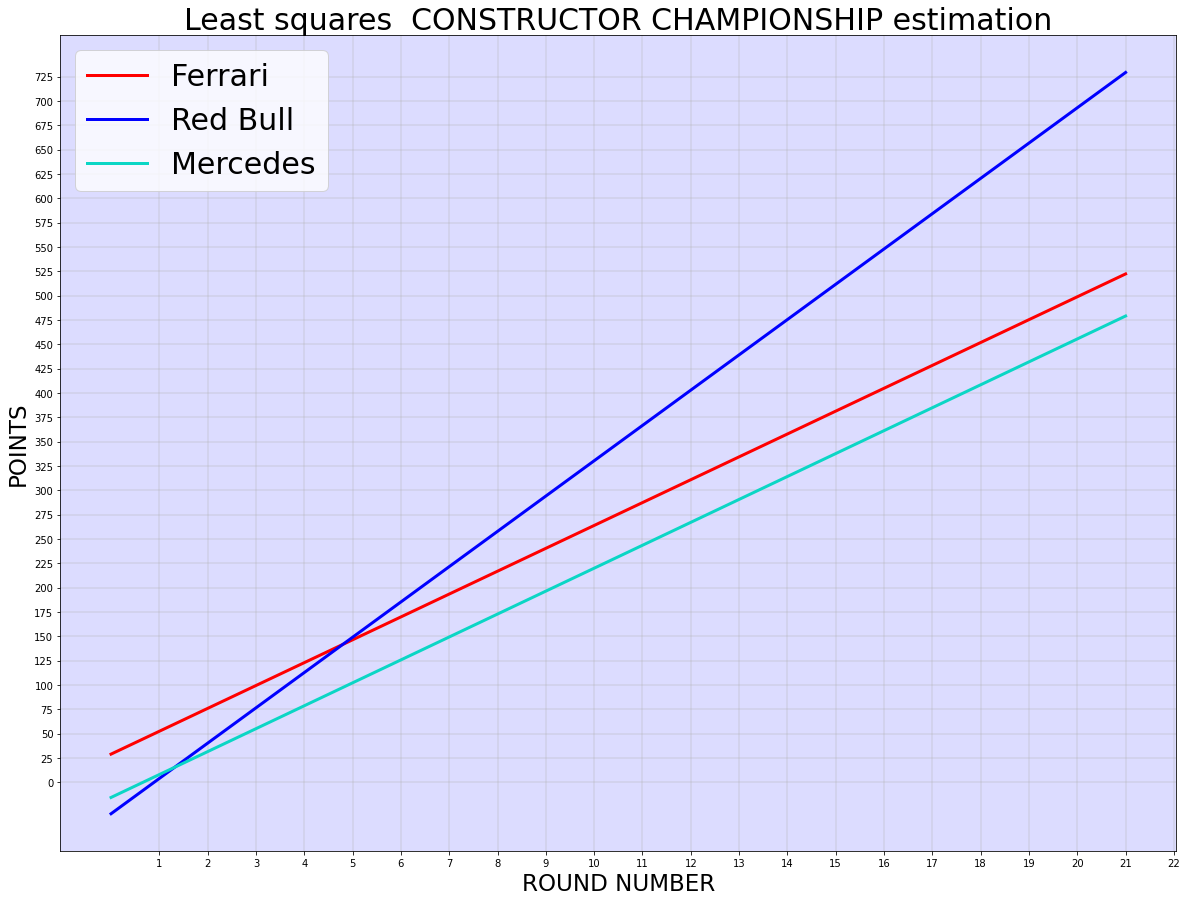

<Figure size 432x288 with 0 Axes>

In [30]:
def ferrari(x):
    return parametros_ferrari[0]*x + parametros_ferrari[1]

def red_bull(x):
    return parametros_red_bull[0]*x + parametros_red_bull[1]

def mercedes(x):
    return parametros_mercedes[0]*x + parametros_mercedes[1]


x = range(22)
fig = plt.figure()
fig, ax = plt.subplots()
    
fig.set_figheight(15)
fig.set_figwidth(20)
plt.plot(x, ferrari(x), color='red',label = 'Ferrari',linewidth = 3)
plt.plot(x, red_bull(x), color='blue',label = 'Red Bull',linewidth = 3)
plt.plot(x, mercedes(x), color=(11/255,   214/255,  197/255),label = 'Mercedes',linewidth = 3)


plt.title('Least squares  CONSTRUCTOR CHAMPIONSHIP estimation',size = 30)
ax.set_ylabel('POINTS',color = 'BLACK',fontsize = 23)
ax.set_xlabel('ROUND NUMBER', fontsize = 23)
plt.legend(fontsize = 30)
ax.grid(axis='both', linewidth=0.45)


plt.yticks(np.arange(0,750, step=25));
plt.xticks(np.arange(1, 23, step=1));

plt.figure(facecolor='yellow')

ax.set_facecolor((220/255,220/255 ,255/255  ))

plt.show()

In [31]:
parametros_red_bull

[36.26176470588236, -32.35000000000002]